In [6]:
%matplotlib inline

from miran import *
import re
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Tweak Pandas display options:
pd.set_option('precision', 2)
pd.set_option('display.colheader_justify', 'right')
pd.set_option('display.width', 40)
pd.set_option('display.max_rows', 100)
pd.set_option('max_colwidth', 50)
pd.set_option('expand_frame_repr', True)


sns.set_style('whitegrid', {'axes.linewidth': 0.2,  'axes.edgecolor': 'gray', 'axes.facecolor':'snow'})
sns.set_palette("Reds_d", 4)
mpl.rc('font', **{'family':'serif', 'serif':['Times']})
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('axes', labelsize=9)
mpl.rc('text', usetex=True)


In [9]:
# carga metadatos desde carpata
#m = metadir_to_pddf('/Users/angel/Insync/Datasets/beatport/meta')

# carga datos desde hoja de cálculo
d = pd.read_excel('/Users/angel/Insync/Datasets/giantsteps/GiantSteps_v3.xlsx')

# solo GS+
d = d[d['*']=='+']

# filtra los campos deseados 
d = d.filter(['id', 'genres', 'key_multi'])

In [12]:
# obtain statistics per key per genre

gen = []
for genre in d.genres.unique():
    temp = d[d.genres==genre]
#    print(genre)
    major, minor, nokey, other = [0,0,0,0]

    t = temp[(temp.key_multi.str.contains('minor') == True) & (temp.key_multi.str.contains('\|') == False)]
    t = t.key_multi.str.contains('minor')
    try:
        minor = t.value_counts()[True]
#        print('min', minor)
    except:
        pass

    t = temp[(temp.key_multi.str.contains('major') == True) & (temp.key_multi.str.contains('\|') == False)]
    t = t.key_multi.str.contains('major')
    try:
        major = t.value_counts()[True]
#        print('maj', major)
    except:
        pass

    t = temp.key_multi.str.contains('X')
    try:
        nokey = t.value_counts()[True]
 #       print('X', nokey)
    except:
        pass
    
    t = temp[(temp.key_multi.str.contains('other') == False) & (temp.key_multi.str.contains('\|') == True)]
    t = t.key_multi.str.contains('\|')
    try:
        other = t.value_counts()[True]
  #      print('ambi', other)
    except:
        pass

    
    t = temp[(temp.key_multi.str.contains('other') == True) & (temp.key_multi.str.contains('\|') == False)]
    t = t.key_multi.str.contains('other')
    try:
        other += t.value_counts()[True]
    except:
        pass

   # print(len(temp), major, minor, nokey, other)
        
    gen.append([int(len(temp)),int(major), int(minor), int(nokey), int(other), str(genre)])
    

# ordena los géneros en base a número de elementos
gen.sort(reverse=True)

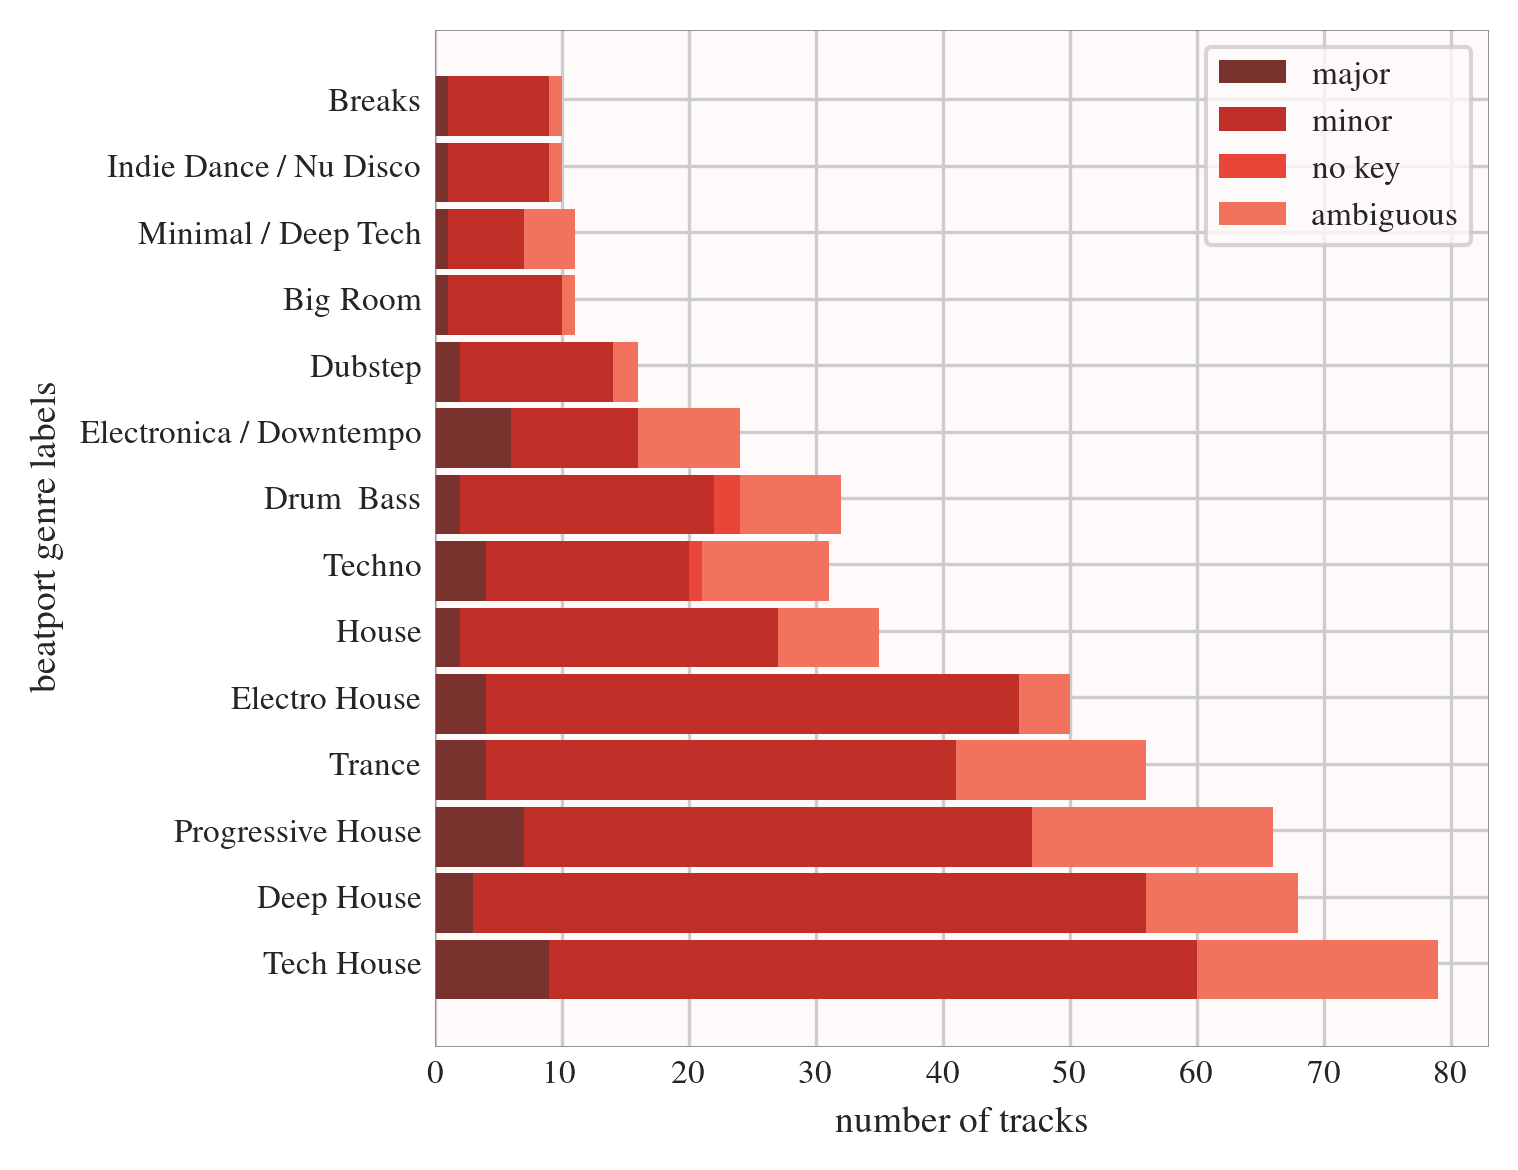

In [13]:
name="gs+_genres" 
output_dir="/Users/angel/Dropbox/Apps/Texpad/Thesis/figures/"
    
major = np.array(np.column_stack(gen)[1].astype(np.int))
minor = np.array(np.column_stack(gen)[2].astype(np.int))
nokey = np.array(np.column_stack(gen)[3].astype(np.int))
other = np.array(np.column_stack(gen)[4].astype(np.int))
    
total_maj = np.sum(major)
total_min = np.sum(minor)
total_nokey = np.sum(nokey)
total_other = np.sum(other)

total_items = total_maj + total_min + total_nokey + total_other

# NOW THE PLOTTING
plt.figure(figsize=(5.16, 4), dpi=150)

plt.ylabel('beatport genre labels')
#plt.ylim((-1, 10))
plt.xlabel('number of tracks')
plt.yticks(np.add(range(len(gen)), 0.1), np.column_stack(gen)[5].astype(str))
plt.barh(range(len(gen)), major, height=0.9, label='major', linewidth=0, edgecolor=(.1, .1, .1))
plt.barh(range(len(gen)), minor, height=0.9, left=major, label='minor', linewidth=0, edgecolor=(.1, .1, .1))
plt.barh(range(len(gen)), nokey, height=0.9, left=major+minor, label='no key', linewidth=0, edgecolor=(.1, .1, .1))
plt.barh(range(len(gen)), other, height=0.9, left=major+minor+nokey, label='ambiguous', linewidth=0, edgecolor=(.1, .1, .1))
plt.legend(fontsize=8, frameon=True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, re.sub(' ', '_', name) + '.pdf'), format="pdf", dpi=1200)

46
337
73
459


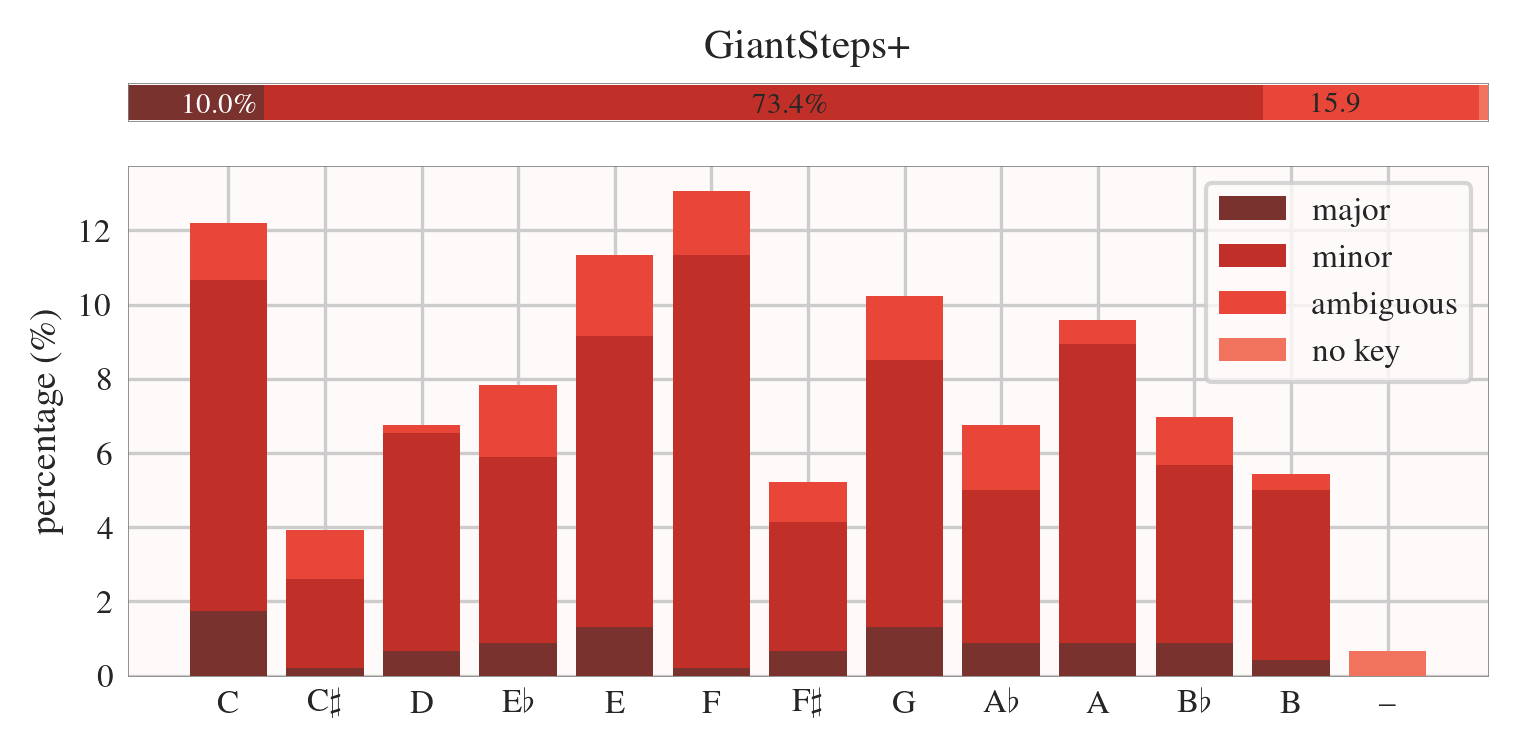

In [19]:
name = "GiantSteps+"
# redefinir función para acomodar "others"
#       C     c#   d  d#   e    f    f#   g    g#    a   a#   b
major = [8,1,3,4,6,1,3,6,4,4,4,2]
minor = [41,11,27,23,36,51,16,33,19,37,22,21]
other = [7,6,1,9,10,8,5,8,8,3,6,2]
print np.sum(major)
print np.sum(minor)
print np.sum(other)
no_key = 3

total_maj = np.sum(major)
total_min = np.sum(minor)
total_other = np.sum(other)
total_items = total_maj + total_min + no_key + total_other
print(total_items)
percentage_factor = 100.00 / total_items
percentage_major = np.multiply(major, percentage_factor)
percentage_minor = np.multiply(minor, percentage_factor)
percentage_other = np.multiply(other, percentage_factor)
percentage_no_key = np.multiply(no_key, percentage_factor)

# NOW THE PLOTTING
plt.figure(figsize=(5.16, 2.6), dpi=150)

gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[0.9, 12])
ax = plt.subplot(gs[0])
a = ax.barh(0, total_maj, linewidth=0.0, edgecolor=(.1, .1, .1))
b = ax.barh(0, total_min, left=total_maj, linewidth=0.0, edgecolor=(.1, .1, .1))
c = ax.barh(0, total_other, left=total_min+total_maj, linewidth=0.0, edgecolor=(.1, .1, .1))
d = ax.barh(0, no_key, left=total_min+total_maj+total_other,  linewidth=0.0, edgecolor=(.1, .1, .1))
plt.xlim((0, total_items))
plt.xticks([])
plt.yticks([])
plt.title(name, fontsize=10)

for r in a:
    pmaj = "%.1f" % (total_maj * percentage_factor)
    str_l = len(pmaj) + 1
    plt.text((total_maj * 0.5) - (str_l * 0.8), -0.25, pmaj  + '\%', fontsize=7, color='white')

for r in b:
    pmin = "%.1f" % (total_min * percentage_factor)
    str_l = len(pmin) + 1
    plt.text(total_maj + (total_min * 0.5) - (str_l * 0.8), -0.25, pmin + '\%', fontsize=7)

for r in c:
    pother = "%.1f" % (total_other * percentage_factor)
    str_l = len(pother) + 1
    plt.text(total_maj + total_min + (total_other * 0.5) - (str_l * 4), -0.25, pother, fontsize=7)

for r in d:
    pnk = "%.1f" % (no_key * percentage_factor)
    if no_key * percentage_factor > 3:
        str_l = len(pnk) + 1
        plt.text(total_maj + total_min + total_other + (no_key * 0.5) - (str_l * 3), -0.25, pnk, fontsize=7)

plt.subplot(gs[1])
plt.ylabel('percentage (\%)')
plt.xticks(range(13), (r'C', r'C$\sharp$', r'D', r'E$\flat$', r'E', r'F', r'F$\sharp$', r'G', r'A$\flat$', r'A', r'B$\flat$', r'B', r'--'))
plt.bar(range(12), percentage_major, label='major', linewidth=0, edgecolor=(.1, .1, .1))
plt.bar(range(12), percentage_minor, bottom=percentage_major, label='minor', linewidth=0, edgecolor=(.1, .1, .1))
plt.bar(range(12), percentage_other, bottom=np.add(percentage_major,percentage_minor), label='ambiguous', linewidth=0, edgecolor=(.1, .1, .1))
plt.bar(12, percentage_no_key, label='no key', linewidth=0, edgecolor=(.1, .1, .1))
plt.legend(fontsize=8, frameon=True)
plt.tight_layout()
plt.savefig(os.path.join("/Users/angel/Dropbox/Apps/Texpad/Thesis/figures//gs+_keys.pdf"), format="pdf", dpi=1200)

In [14]:
# subdataframe con genres
mg = m.filter(['filename', 'id', 'genres'])

# imprime sólo entradas pertenecientes a un género
mg[mg.genres=="Big Room"]

# para retornar filas con la substring seleccionada en el campo seleccionado
mg[mg.genres.str.contains('Trap')==True]

# para retornar filas con un campo determinado
mg[mg.genres=="Big Room"]

# retorna el numero de entradas conteniendo substring en campo
d.key1.str.contains('minor').value_counts()

# distribución por géneros
n.genres.value_counts()

# distribución por keys
d.key1.value_counts()

NameError: name 'm' is not defined

In [15]:
# carga metadatos desde carpata
#m = metadir_to_pddf('/Users/angel/Insync/Datasets/beatport/meta')

# carga datos desde hoja de cálculo
d = pd.read_excel('/Users/angel/Insync/Datasets/giantsteps/GiantSteps_v3.xlsx')

# solo GS+

d = d[d['*']=='+']


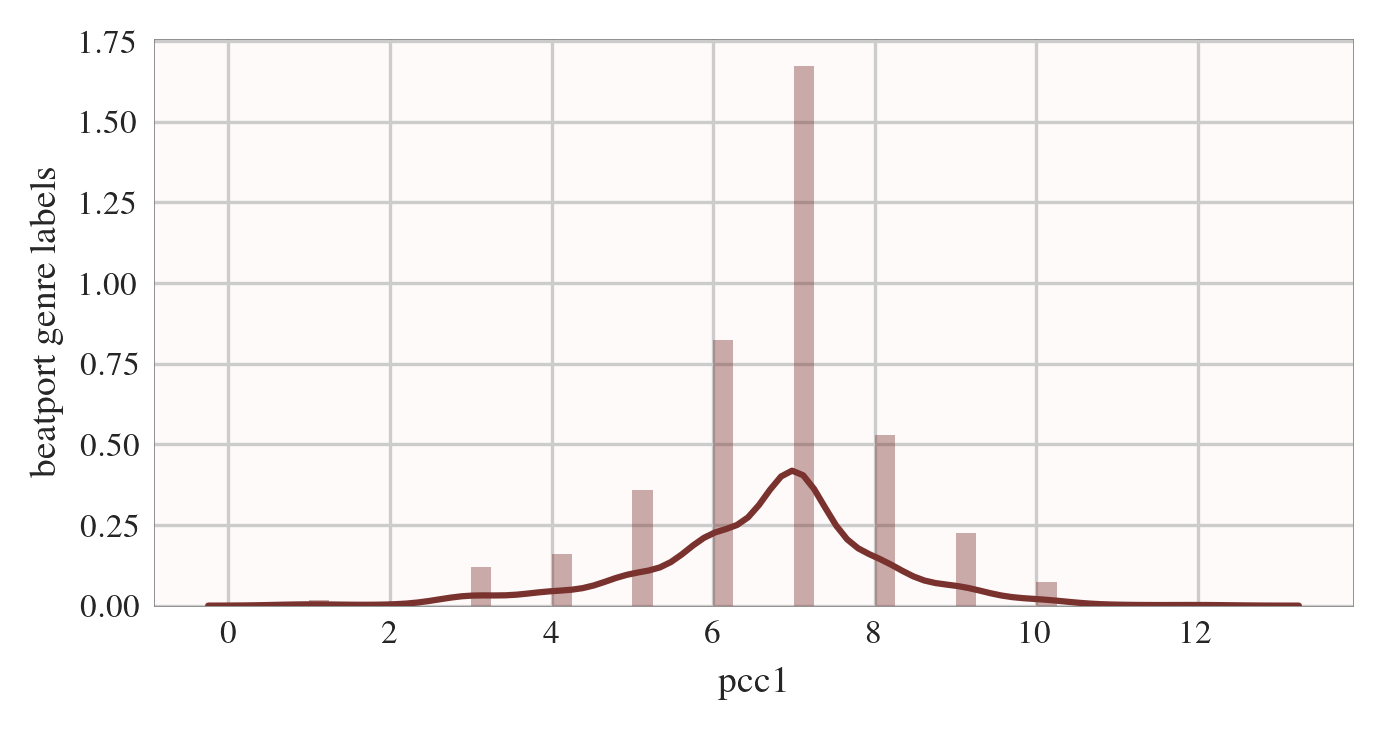

In [16]:
name = 'cardinality'
# NOW THE PLOTTING
plt.figure(figsize=(5.16, 2.5), dpi=150)

plt.ylabel('beatport genre labels')
#plt.ylim((-1, 10))
plt.xlabel('number of pitch-classes per track')
#plt.tight_layout()
#plt.savefig(os.path.join(output_dir, re.sub(' ', '_', name) + '.pdf'), format="pdf", dpi=1200)
sns.distplot(d.pcc1)

In [ ]:
# check manually for keys... by using conditionals
t = d[(d.key1.str.contains('other') == True)]# & (d.key1.str.contains('\|') == True)]
t.key1.value_counts()